In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

pd.set_option('display.MAX_COLUMN',None)
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Column Profiling
pd.read_csv('./lending_club_info.csv')

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [4]:
# DATASET
df = pd.read_csv('./lending_club_loan_two.csv')
df.sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
48419,18000.0,36 months,7.90,563.23,A,A4,Sr. Project Manager,1 year,OWN,208000.0,Not Verified,May-2014,Fully Paid,debt_consolidation,Debt consolidation,9.32,May-1970,8.0,0.0,20634.0,59.0,27.0,w,INDIVIDUAL,1.0,0.0,"38127 Williams Rest\r\nWest Elizabethborough, ..."
307243,7200.0,36 months,7.90,225.29,A,A4,"MetaClin Research, Inc.",7 years,RENT,65000.0,Not Verified,Mar-2012,Fully Paid,debt_consolidation,Lifeline,24.82,Jun-1999,8.0,0.0,12017.0,55.5,20.0,f,INDIVIDUAL,NaN,0.0,"663 Michael Ridge\r\nLake Denise, UT 48052"
155734,16000.0,60 months,14.16,373.63,C,C2,Project Manager,3 years,RENT,55000.0,Not Verified,May-2014,Fully Paid,debt_consolidation,Debt consolidation,23.26,Sep-1997,8.0,0.0,10833.0,88.1,28.0,w,INDIVIDUAL,0.0,0.0,661 Nathaniel Gardens Apt. 769\r\nLake Mathewc...
219428,4000.0,36 months,17.58,143.77,D,D4,"Lipsitz & Ponterio, LLC",3 years,MORTGAGE,40000.0,Not Verified,Sep-2011,Fully Paid,wedding,Wedding Loan,8.82,Mar-2003,6.0,0.0,2876.0,95.9,21.0,f,INDIVIDUAL,NaN,0.0,"74842 Williams Walk\r\nDawnhaven, NC 22690"
122257,26475.0,36 months,10.99,866.64,B,B4,Executive Director/Share Holder,10+ years,RENT,150000.0,Verified,Jul-2015,Fully Paid,debt_consolidation,Debt consolidation,17.07,May-1979,18.0,0.0,33782.0,65.7,34.0,w,INDIVIDUAL,1.0,0.0,"07333 Roberson Mission\r\nNew Debbiefurt, AK 4..."


In [5]:
df.info(verbose='bool',show_counts='bool')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,NaN,NaN,NaN,14113.888089,8357.441341,500.0,8000.0,12000.0,20000.0,40000.0
term,396030,2,36 months,302005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,396030.0,NaN,NaN,NaN,13.6394,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,NaN,NaN,NaN,431.849698,250.72779,16.08,250.33,375.43,567.3,1533.81
grade,396030,7,B,116018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,396030,35,B3,26655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,373103,173105,Teacher,4389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,377729,11,10+ years,126041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,396030,6,MORTGAGE,198348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,396030.0,NaN,NaN,NaN,74203.175798,61637.621158,0.0,45000.0,64000.0,90000.0,8706582.0


In [7]:
# missing values
df.isna().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64

In [8]:
# number of duplicate records
df.duplicated().sum()

0

In [9]:
@np.vectorize
def term_mon2yr(month):
    month = month.strip()
    month = int(month.split(" ")[0])
    yr = np.nan
    if(month//12>0):
        yr = month//12
    return yr

@np.vectorize
def prepare_city(city):
    if(len(city.split(" "))==3):
        city=city.split(" ")
        return city[0]
    return city

In [10]:
df.issue_d  = pd.to_datetime(df.issue_d)
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line)

In [11]:
df['term_in_yr'] = term_mon2yr(df.term)
df['term_in_yr'] = df.term_in_yr.apply(lambda x: 'THREE' if(x==3) else 'FIVE' )

df['issue_yr']    = df.issue_d.dt.year
df['issue_month'] = df.issue_d.dt.month

df['address_state'] = df.address.str.split("\r\n").apply(lambda x: x[-1].split(" ")[-2])
df['address_city'] = pd.Series(
    prepare_city(
        df.address.str.split("\r\n").apply(lambda x: x[1].split(",")[0].strip())
    )
)

df['loan_status'] = df.loan_status.apply(lambda x: 1 if(x=='Fully Paid') else 0)

df['credit_card_yrs']  = pd.to_datetime('today').year - df.earliest_cr_line.dt.year
df.drop('earliest_cr_line',axis=1,inplace=True)

df.drop('term',inplace=True,axis=1)
df.drop('issue_d',axis=1,inplace=True)
df.drop('title',axis=1,inplace=True)
df.drop('address',axis=1,inplace=True)

/tmp/ipykernel_48855/561752561.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=df[feature].value_counts(dropna=False).index.to_list(),rotation=90)


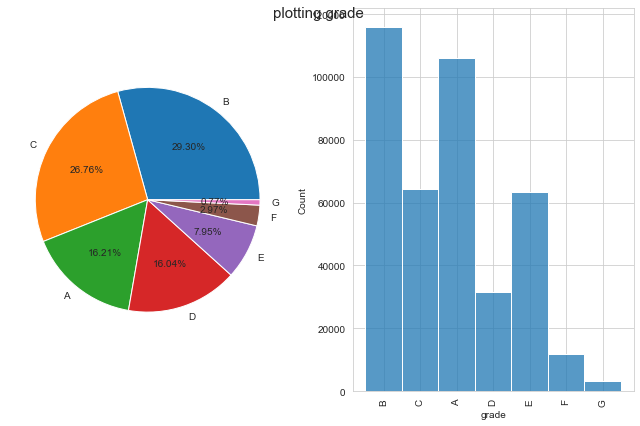

/tmp/ipykernel_48855/561752561.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=df[feature].value_counts().index[:20],rotation=90)


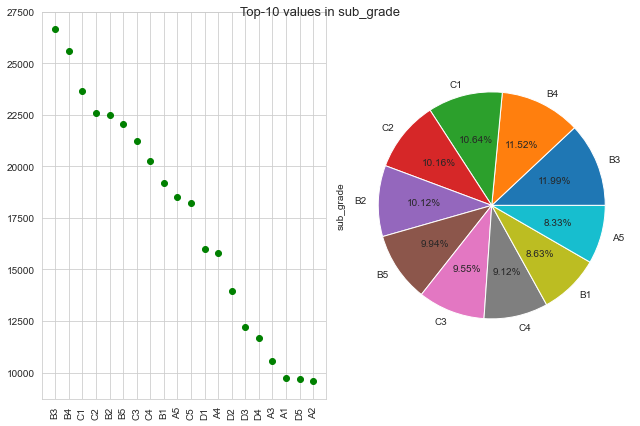

/tmp/ipykernel_48855/561752561.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=df[feature].value_counts().index[:20],rotation=90)


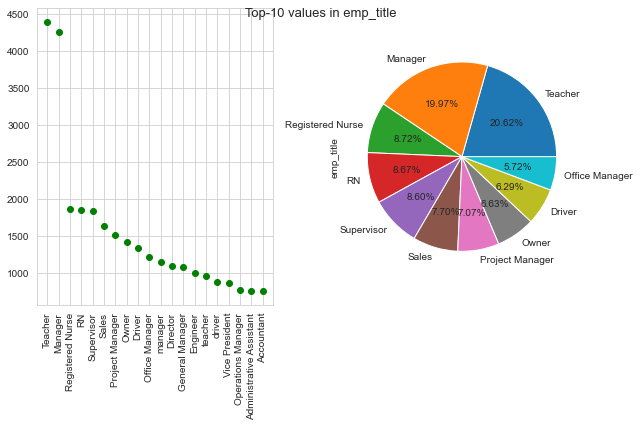

/tmp/ipykernel_48855/561752561.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=df[feature].value_counts().index[:20],rotation=90)


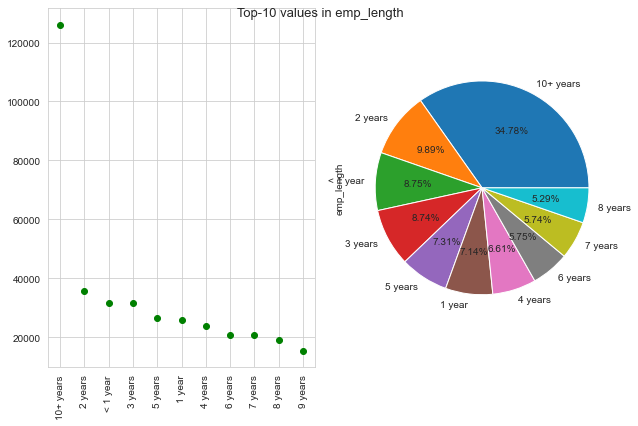

/tmp/ipykernel_48855/561752561.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=df[feature].value_counts(dropna=False).index.to_list(),rotation=90)


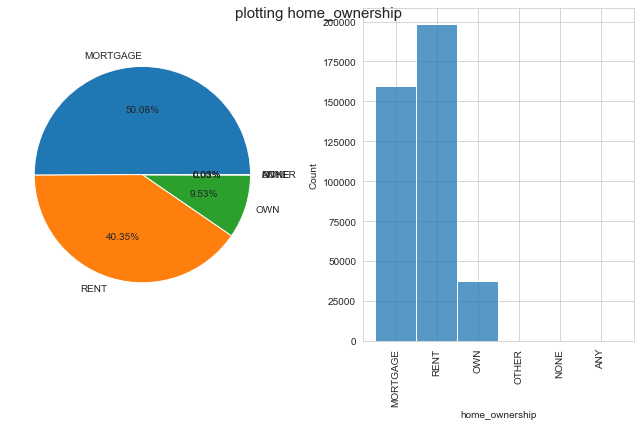

/tmp/ipykernel_48855/561752561.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=df[feature].value_counts(dropna=False).index.to_list(),rotation=90)


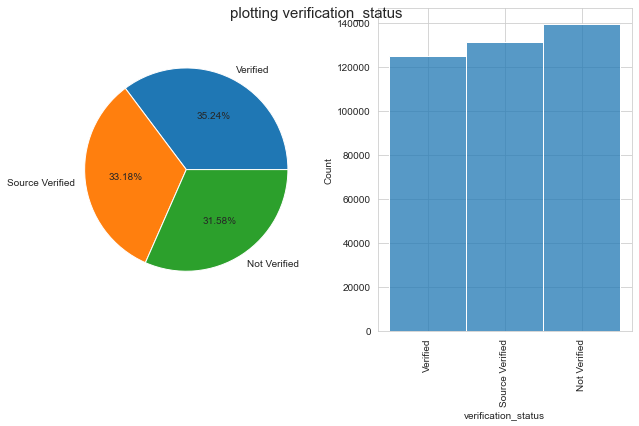

/tmp/ipykernel_48855/561752561.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=df[feature].value_counts().index[:20],rotation=90)


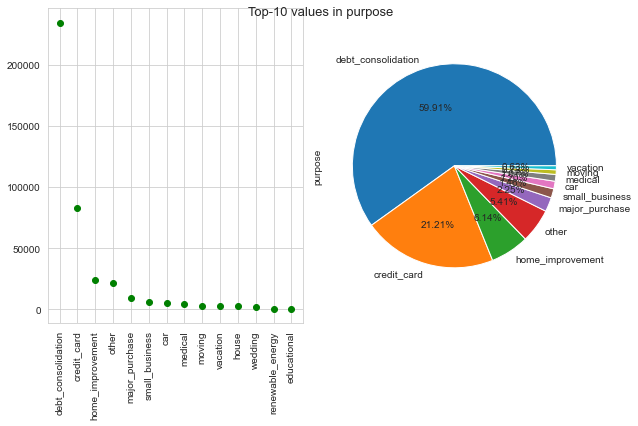

/tmp/ipykernel_48855/561752561.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=df[feature].value_counts(dropna=False).index.to_list(),rotation=90)


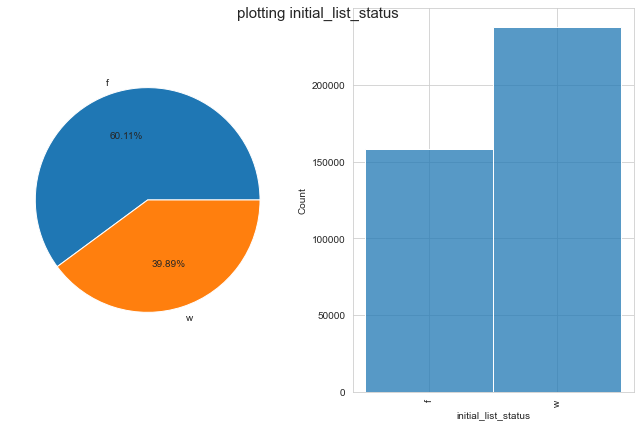

/tmp/ipykernel_48855/561752561.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=df[feature].value_counts(dropna=False).index.to_list(),rotation=90)


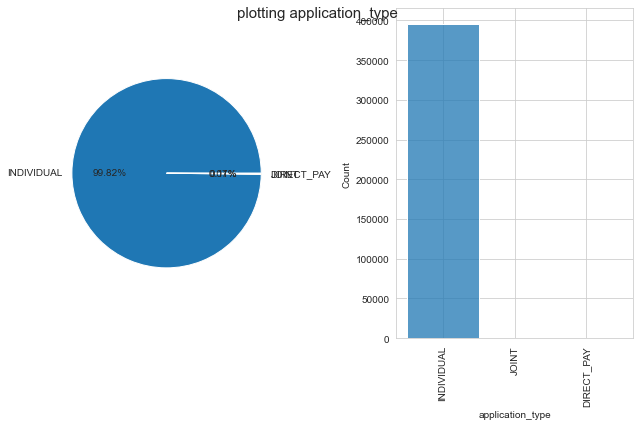

/tmp/ipykernel_48855/561752561.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=df[feature].value_counts(dropna=False).index.to_list(),rotation=90)


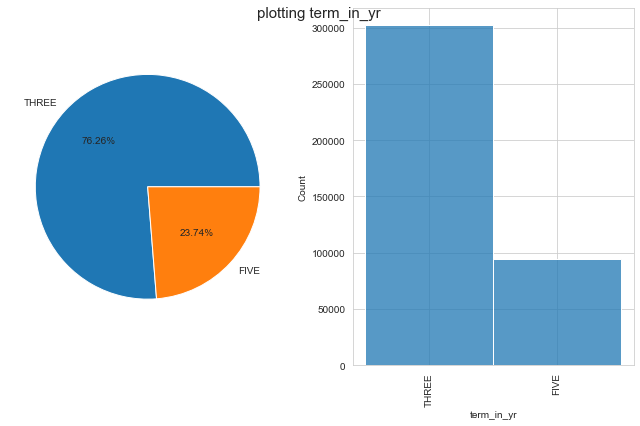

/tmp/ipykernel_48855/561752561.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=df[feature].value_counts().index[:20],rotation=90)


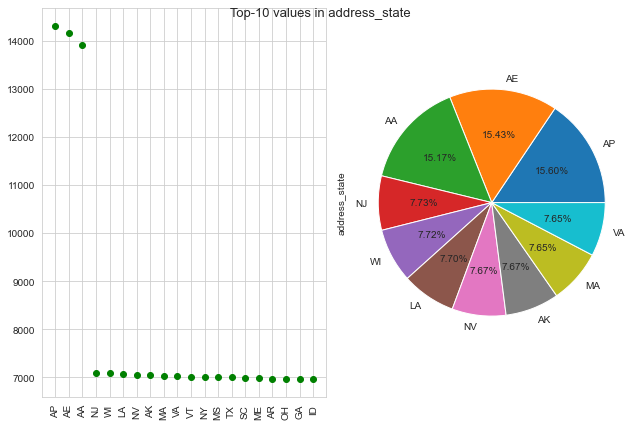

/tmp/ipykernel_48855/561752561.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=df[feature].value_counts().index[:20],rotation=90)


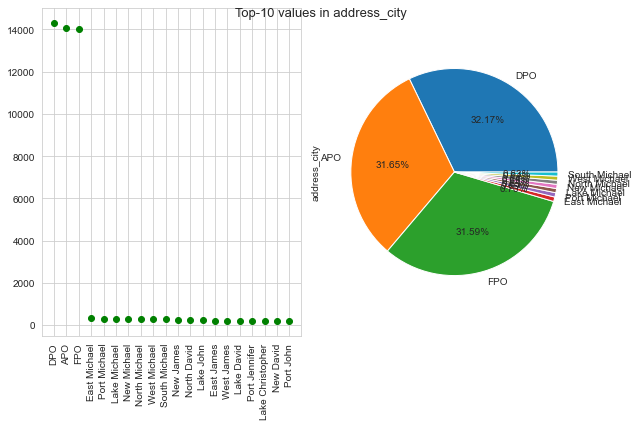

In [12]:
for feature in df.select_dtypes(np.object_).columns:
    if(df[feature].nunique()>10):
        fig,(ax1,ax2)= plt.subplots(ncols=2,nrows=1,figsize=(9,6))
        df[feature].value_counts()[:10].plot.pie(autopct='%1.2f%%')
        ax1.plot(
            df[feature].value_counts().index[:20],
            df[feature].value_counts().values[:20],
            'go'
        )
        ax1.set_xticklabels(labels=df[feature].value_counts().index[:20],rotation=90)
        fig.tight_layout()
        fig.suptitle(f"Top-10 values in {feature}",fontsize=13)
        plt.show()
        
    else:
        fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,sharey=False,figsize=(9,6))
        ax1.pie(
              df[feature].value_counts(dropna=False),autopct='%1.2f%%',labels=df[feature].value_counts(dropna=False).index
        )
        sns.histplot(
            data=df,x=feature,ax=ax2
        )
        ax2.set_xticklabels(labels=df[feature].value_counts(dropna=False).index.to_list(),rotation=90)
        fig.tight_layout()
        fig.suptitle(f"plotting {feature} ",fontsize=15)
        plt.show()

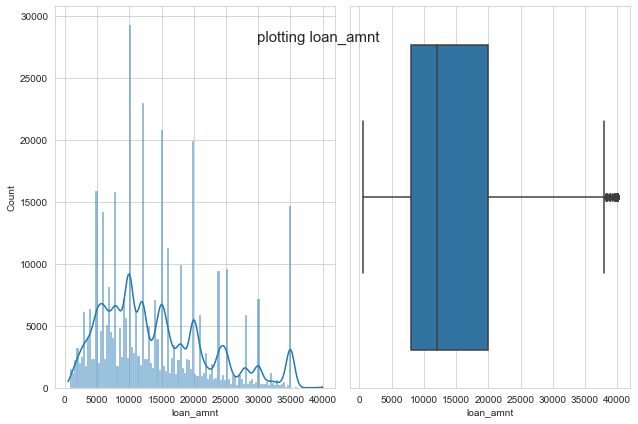

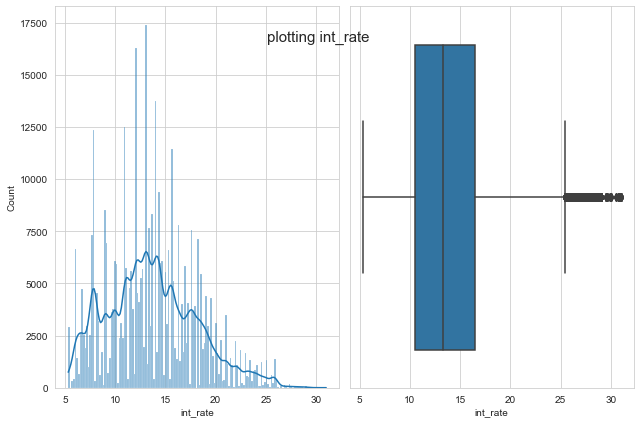

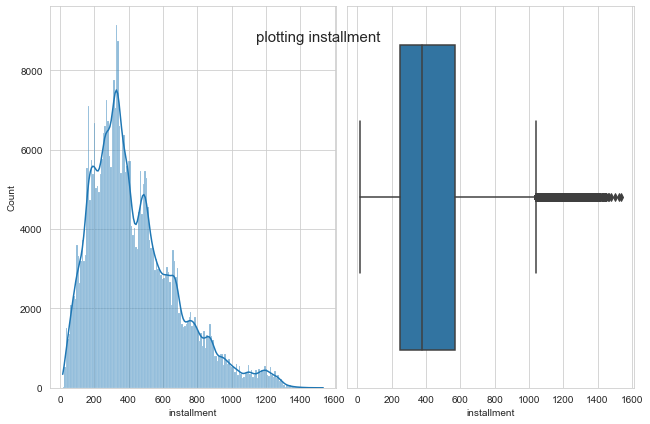

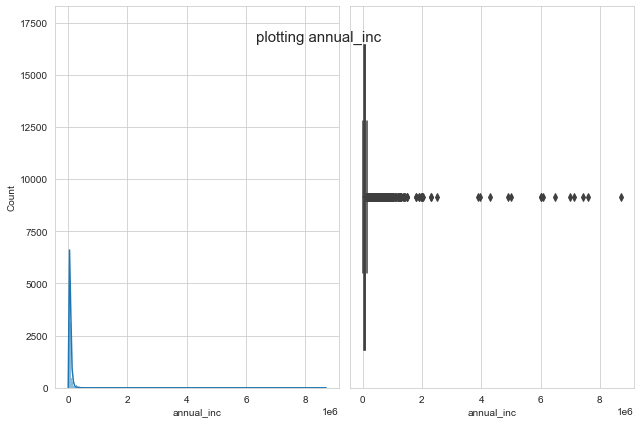

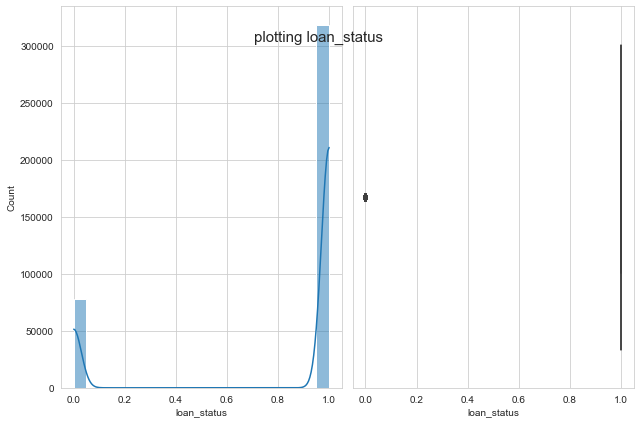

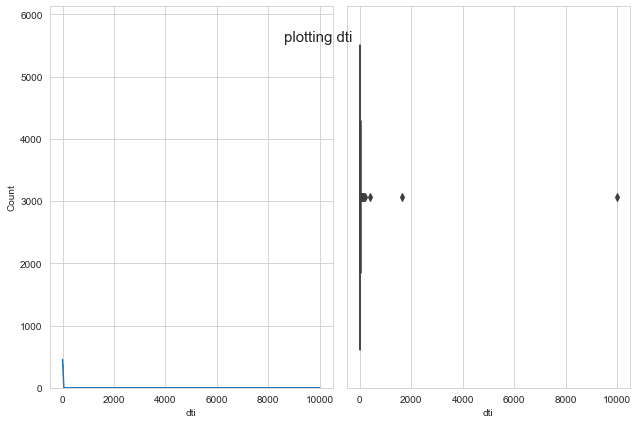

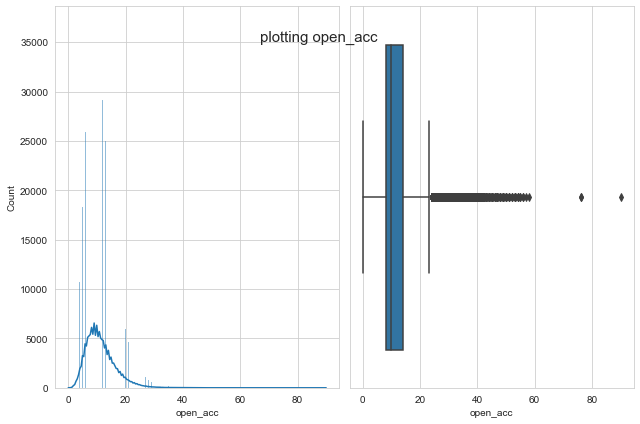

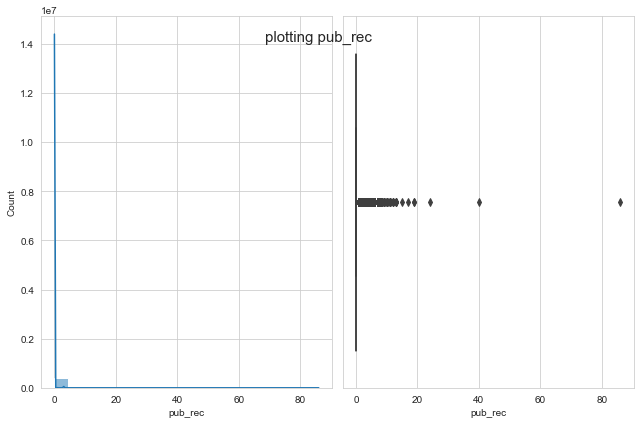

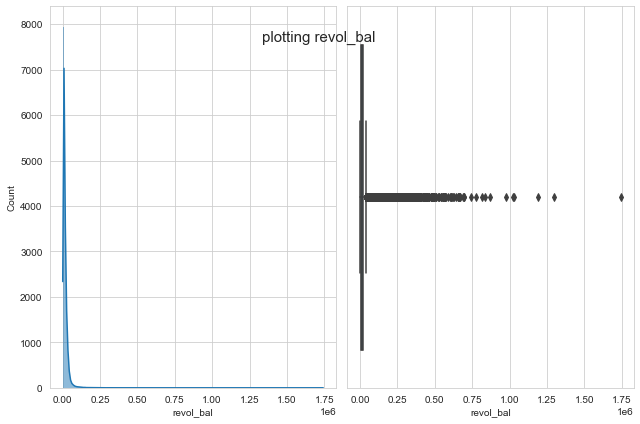

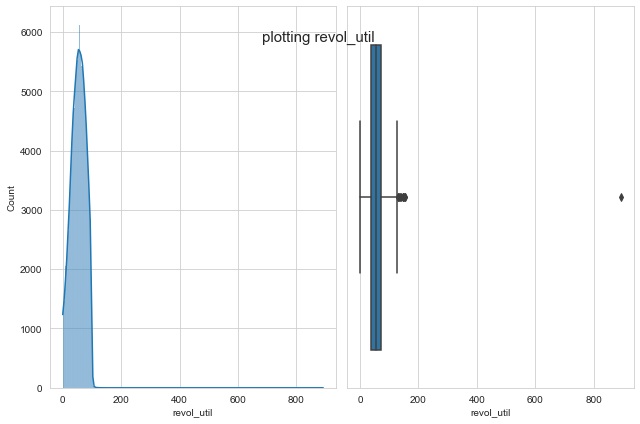

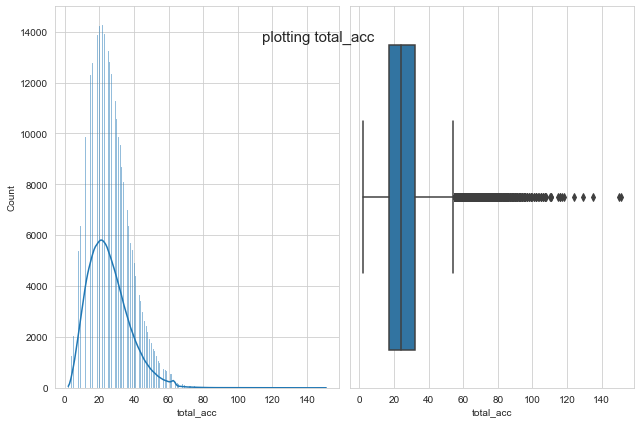

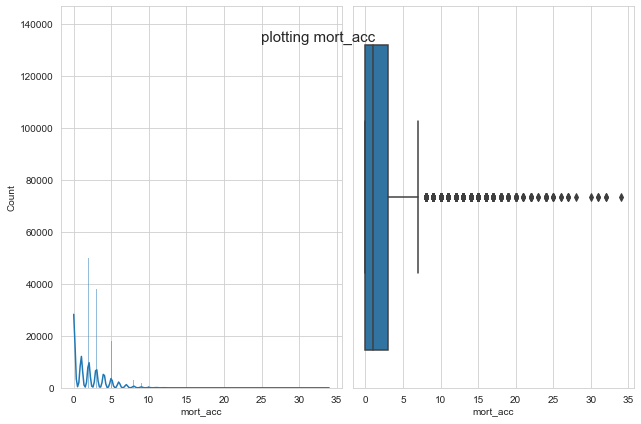

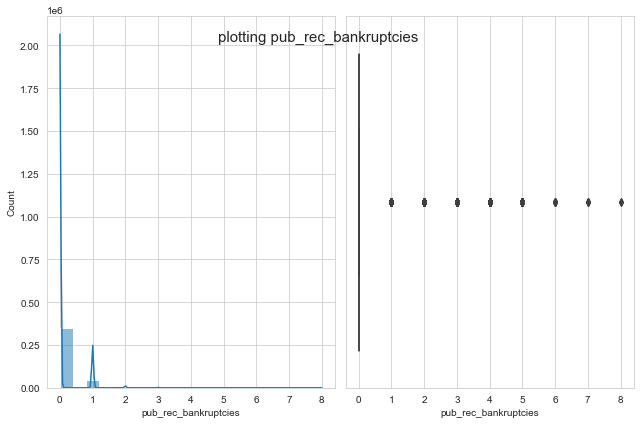

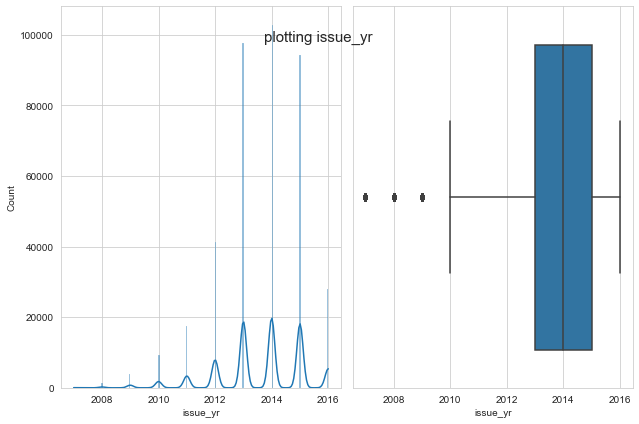

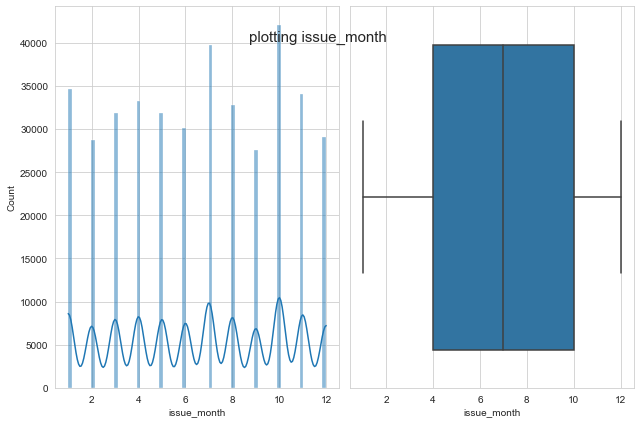

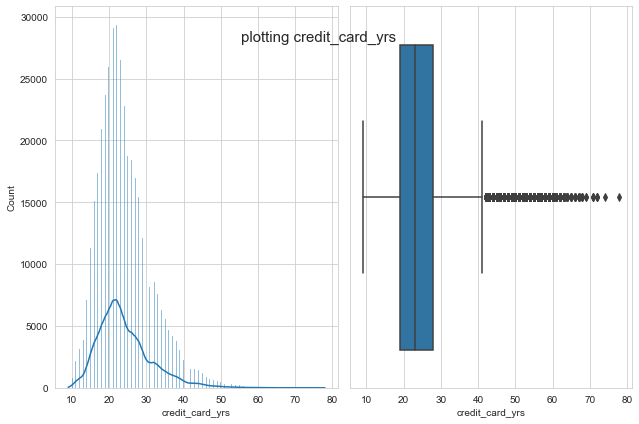

In [13]:
for feature in df.select_dtypes(np.number).columns:
    fig,(ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(9,6))
    sns.histplot( data=df,x=feature, ax=ax1,kde=True )
    sns.boxplot(  data=df,x=feature, ax=ax2 )
    plt.tight_layout()
    fig.suptitle(f"plotting {feature} ",fontsize=15,y=0.92)
    plt.show()

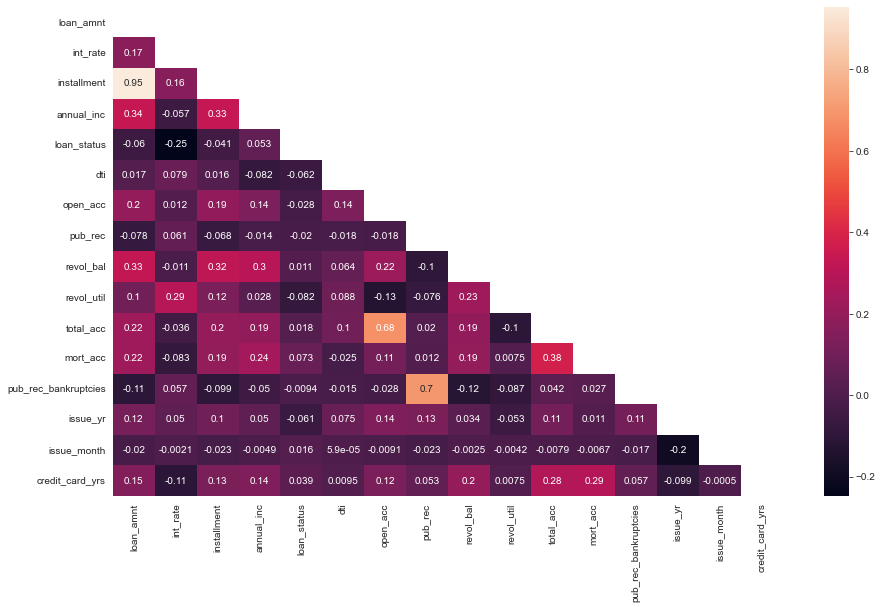

In [14]:
plt.figure(figsize=(15,9))

corr = df.corr()
_ = np.triu(corr)

sns.heatmap(
    corr,annot=True,mask=_
)
plt.show()

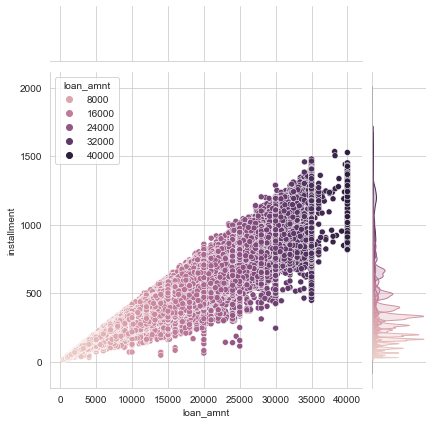

In [15]:
sns.jointplot(
    data=df,
    x='loan_amnt',
    y='installment',
    hue='loan_amnt'
)
plt.show()

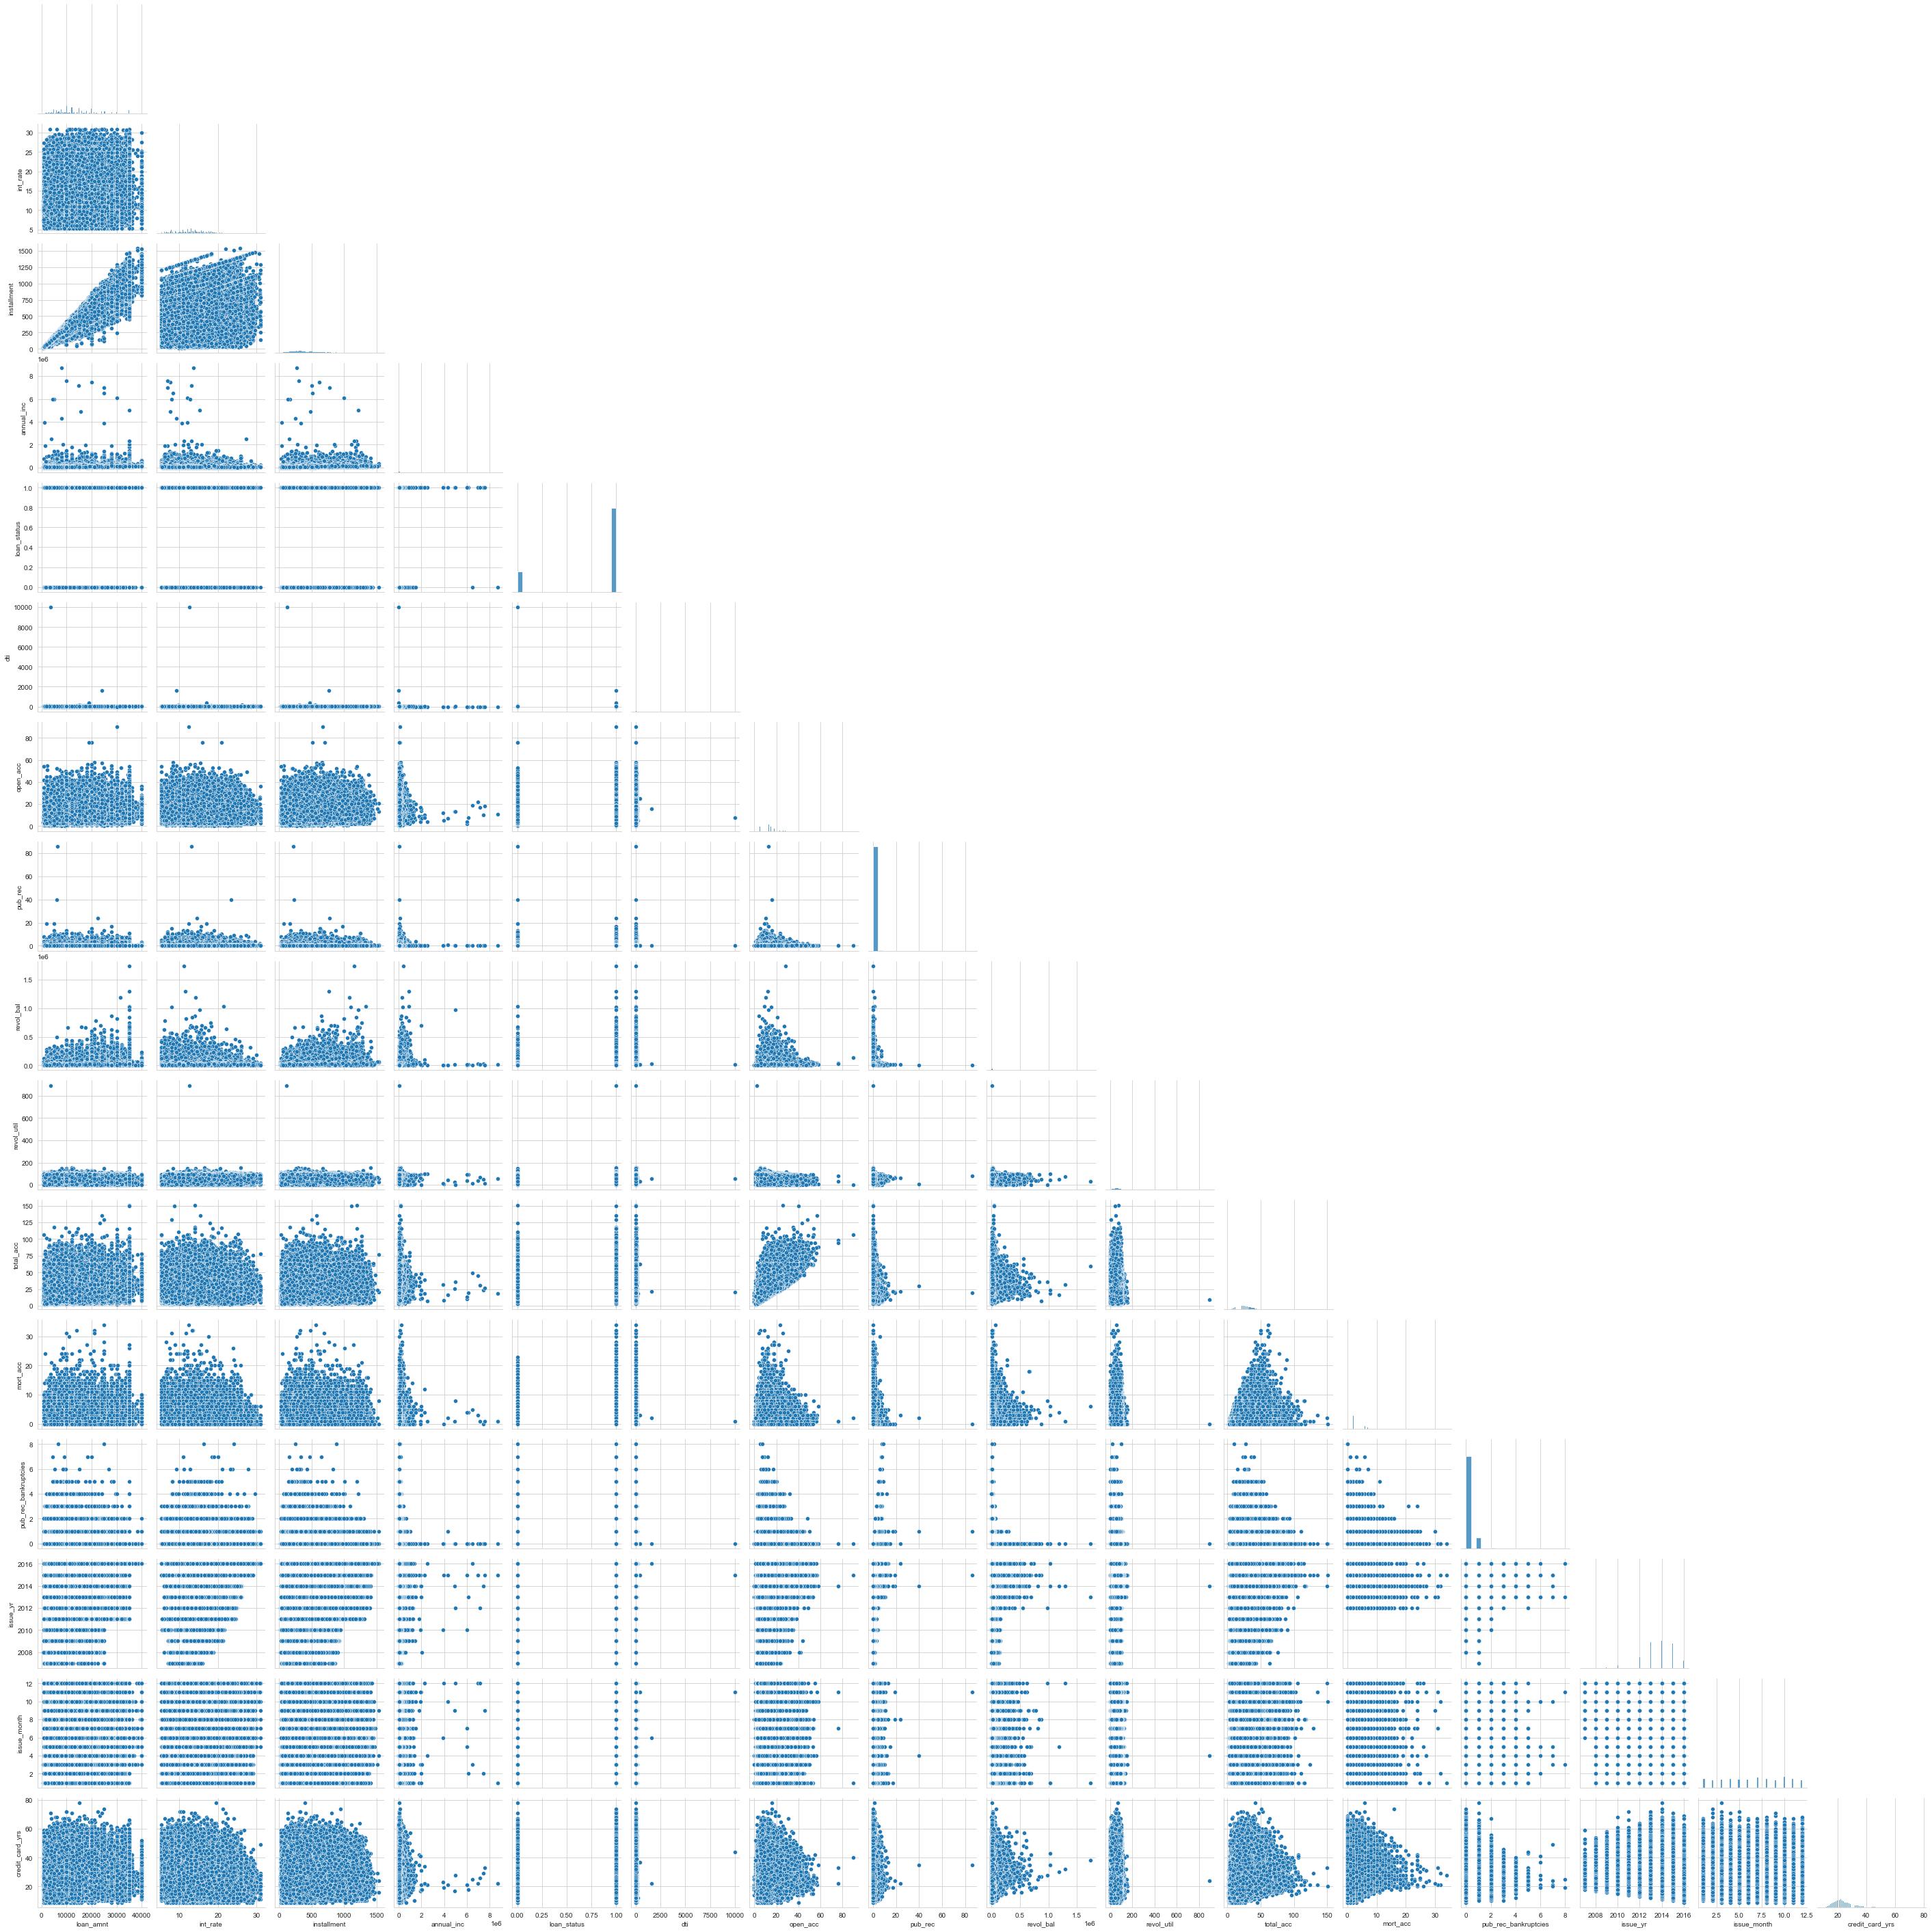

In [16]:
sns.pairplot(
    data=df,
    corner=True,
)
plt.show()

In [17]:
df.drop('installment',axis=1,inplace=True)

In [18]:
# target variable imbalance
print(f"Percentage wise~\n{df.loan_status.value_counts(normalize=True).mul(100)}")
print(f"Count wise~\n{df.loan_status.value_counts()}")

Percentage wise~
1    80.387092
0    19.612908
Name: loan_status, dtype: float64
Count wise~
1    318357
0     77673
Name: loan_status, dtype: int64


In [19]:
no_of_loan = pd.pivot_table(
    data=df,
    index=['issue_yr','issue_month'],
    columns='purpose',
    values='loan_amnt',
    aggfunc=np.count_nonzero
).reset_index()
#no_of_loan.to_csv('no_of_loan.csv')
no_of_loan

purpose,issue_yr,issue_month,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,2007,6,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,7,1.0,6.0,3.0,2.0,5.0,NaN,NaN,NaN,1.0,2.0,NaN,4.0,2.0,NaN
2,2007,8,1.0,7.0,5.0,1.0,4.0,1.0,NaN,NaN,1.0,3.0,NaN,2.0,1.0,NaN
3,2007,9,1.0,1.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,4.0,NaN,2.0,NaN,NaN
4,2007,10,NaN,2.0,12.0,2.0,1.0,NaN,NaN,NaN,1.0,11.0,NaN,4.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2016,8,19.0,233.0,924.0,NaN,138.0,19.0,51.0,16.0,21.0,163.0,3.0,12.0,16.0,NaN
111,2016,9,13.0,156.0,587.0,NaN,94.0,16.0,44.0,20.0,16.0,99.0,NaN,5.0,9.0,NaN
112,2016,10,18.0,133.0,449.0,NaN,80.0,6.0,30.0,14.0,10.0,98.0,1.0,7.0,7.0,NaN
113,2016,11,7.0,96.0,321.0,NaN,42.0,4.0,29.0,13.0,6.0,60.0,NaN,13.0,3.0,NaN


In [20]:
loan_by_yr = no_of_loan.groupby(['issue_yr'])[['car', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding']].sum()
loan_by_yr

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
issue_yr,,,,,,,,,,,,,,
2007,3.0,31.0,61.0,5.0,18.0,1.0,5.0,1.0,6.0,35.0,0.0,19.0,3.0,7.0
2008,37.0,223.0,475.0,42.0,72.0,10.0,47.0,24.0,17.0,175.0,2.0,76.0,8.0,32.0
2009,137.0,472.0,1590.0,127.0,284.0,56.0,191.0,67.0,48.0,468.0,4.0,249.0,21.0,112.0
2010,332.0,1152.0,4220.0,82.0,683.0,72.0,659.0,157.0,158.0,1060.0,27.0,347.0,87.0,222.0
2011,741.0,2259.0,8573.0,0.0,1342.0,179.0,870.0,309.0,239.0,1516.0,43.0,782.0,182.0,400.0
2012,690.0,8154.0,23611.0,0.0,2210.0,327.0,1059.0,509.0,326.0,2325.0,55.0,1070.0,284.0,582.0
2013,785.0,23973.0,57871.0,0.0,5319.0,495.0,1700.0,696.0,490.0,4381.0,38.0,1002.0,461.0,451.0
2014,795.0,22736.0,63706.0,0.0,5722.0,364.0,1673.0,1077.0,637.0,4491.0,65.0,1014.0,576.0,4.0
2015,815.0,18883.0,58594.0,1.0,6015.0,456.0,1731.0,958.0,659.0,4626.0,68.0,860.0,596.0,2.0


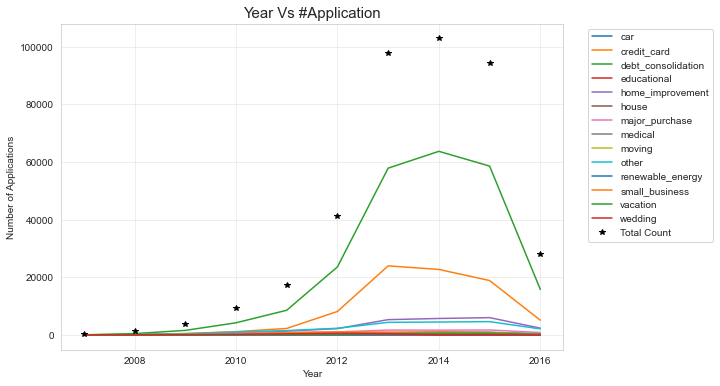

In [21]:
plt.figure(figsize=(9,6))
for purpose in loan_by_yr.columns:
    plt.plot(loan_by_yr.index,loan_by_yr[purpose],label=purpose)

plt.plot(
    loan_by_yr.sum(axis=1).index,
    loan_by_yr.sum(axis=1).values,
    'k*',
    label="Total Count"
)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid(alpha=0.4)
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.title("Year Vs #Application",fontsize=15)
plt.show()

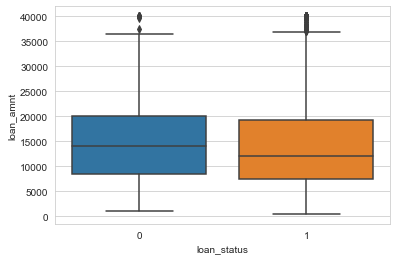

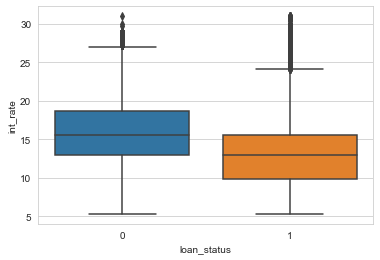

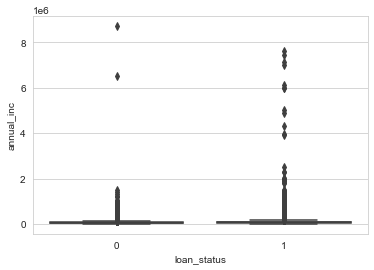

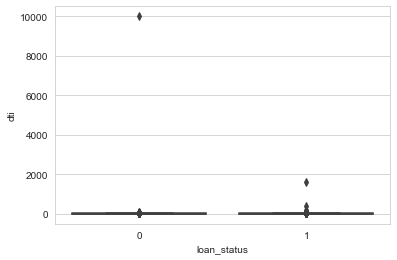

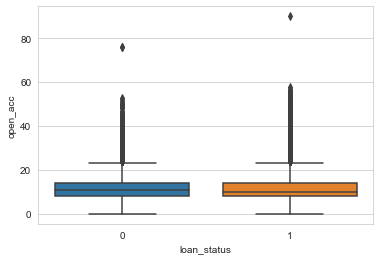

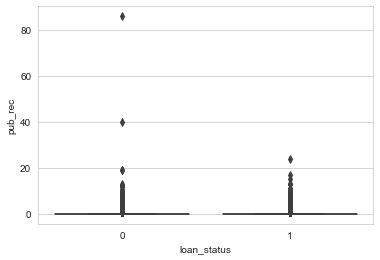

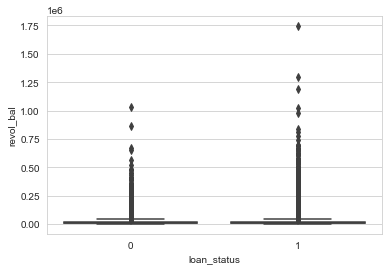

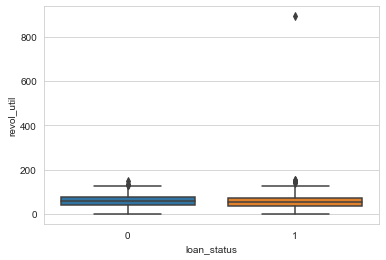

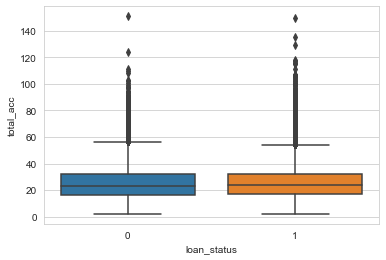

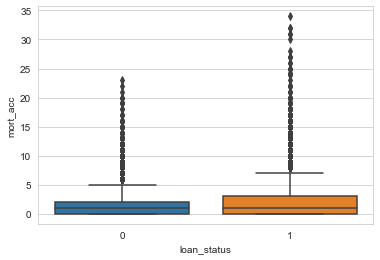

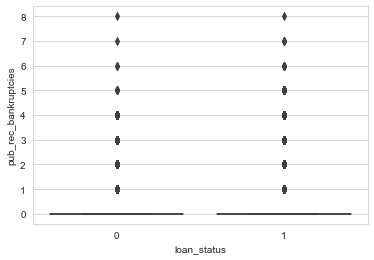

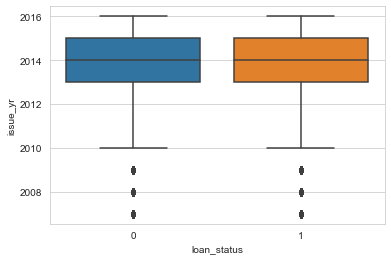

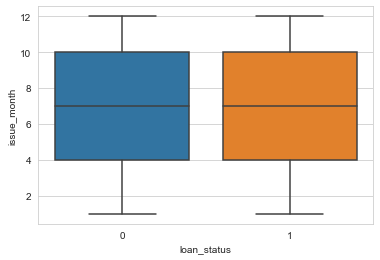

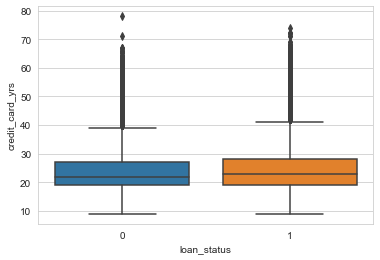

In [22]:
for feature in df.drop('loan_status',axis=1).select_dtypes(np.number):
    sns.boxplot(data=df,x='loan_status',y=feature)
    plt.show()

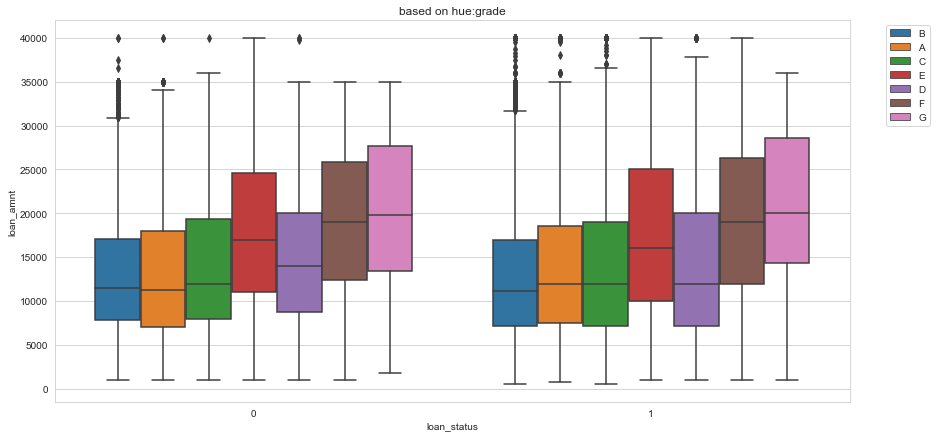

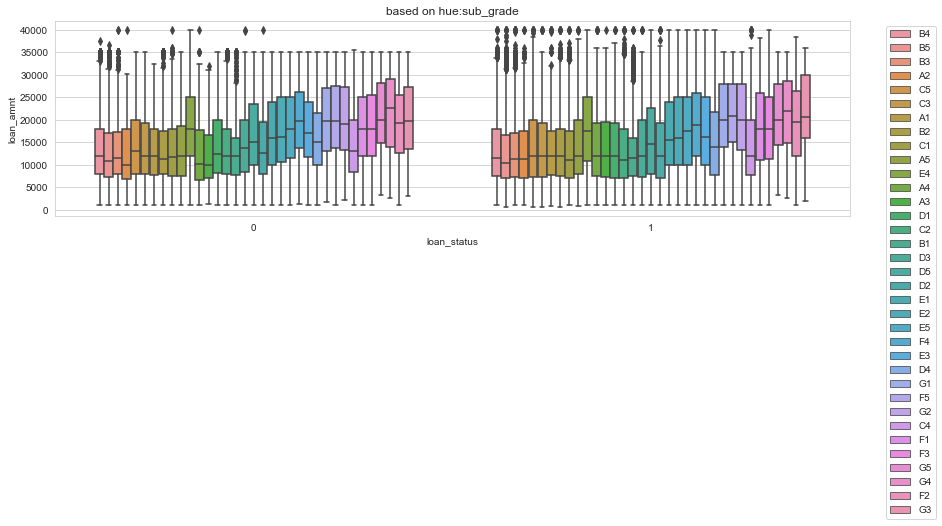

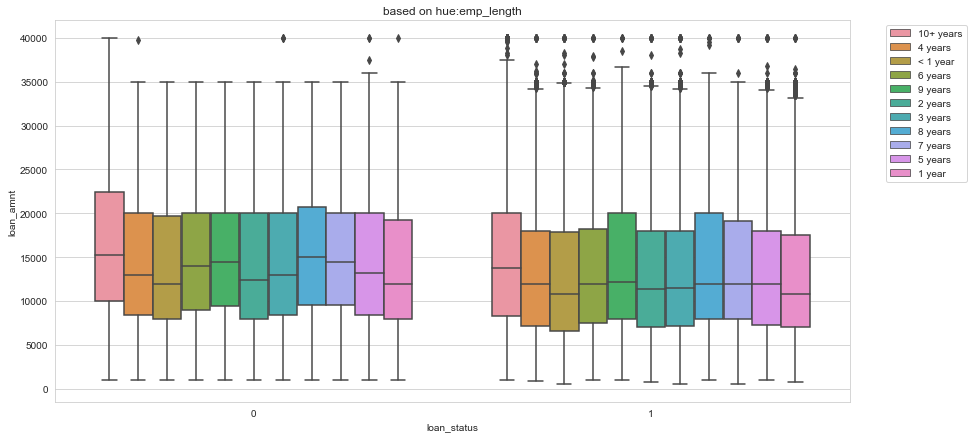

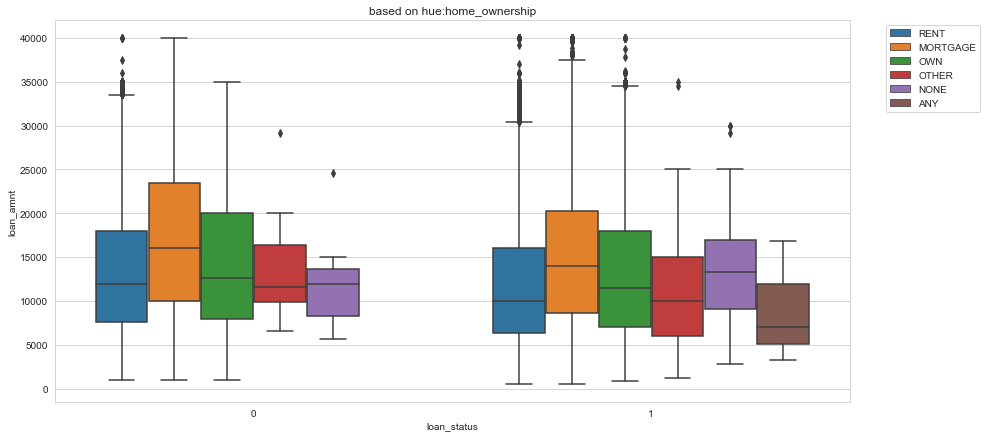

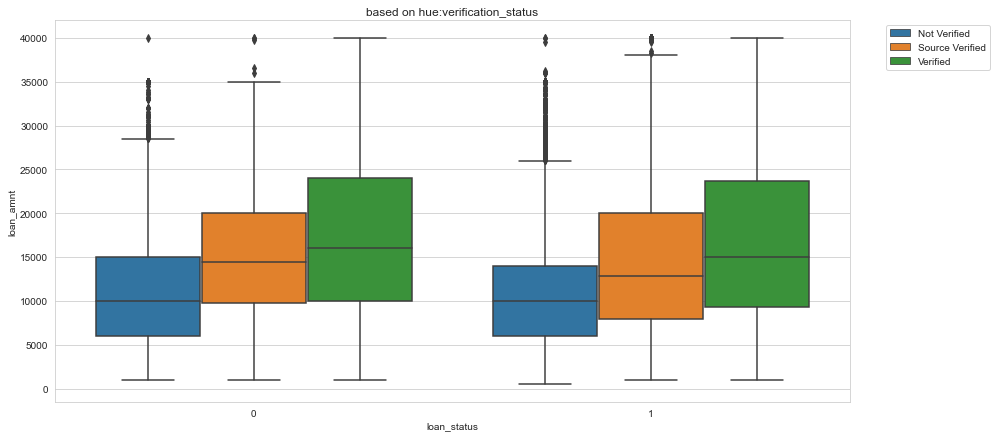

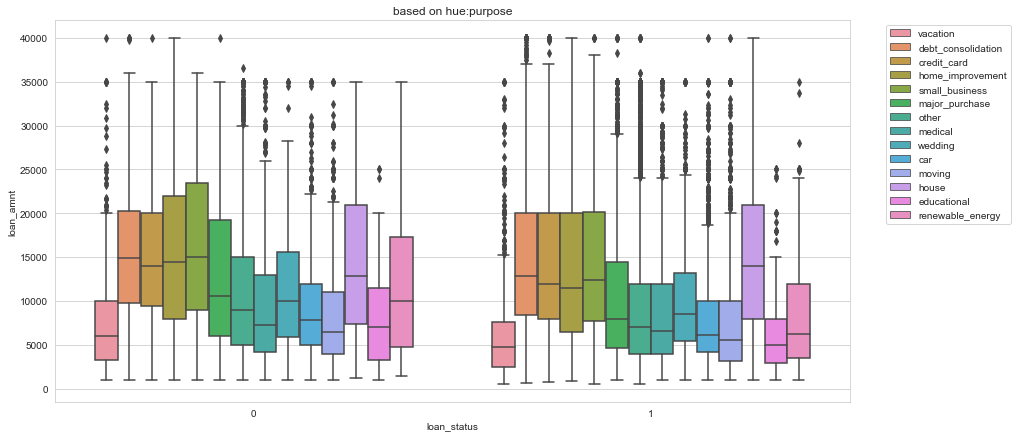

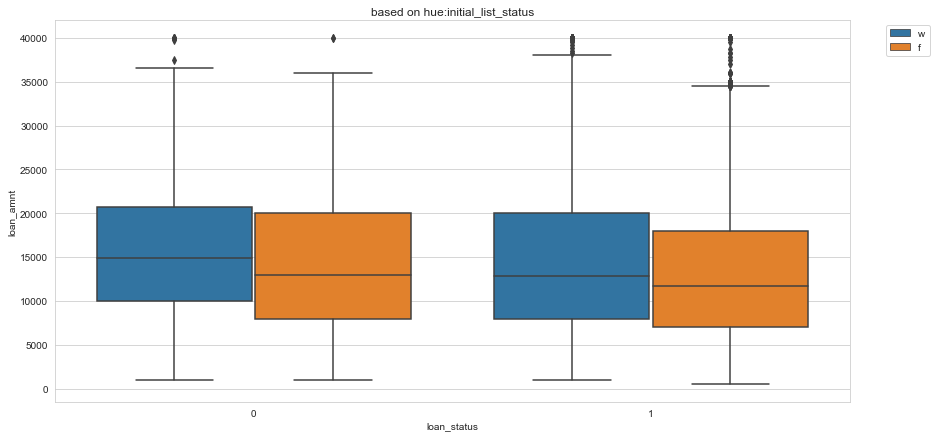

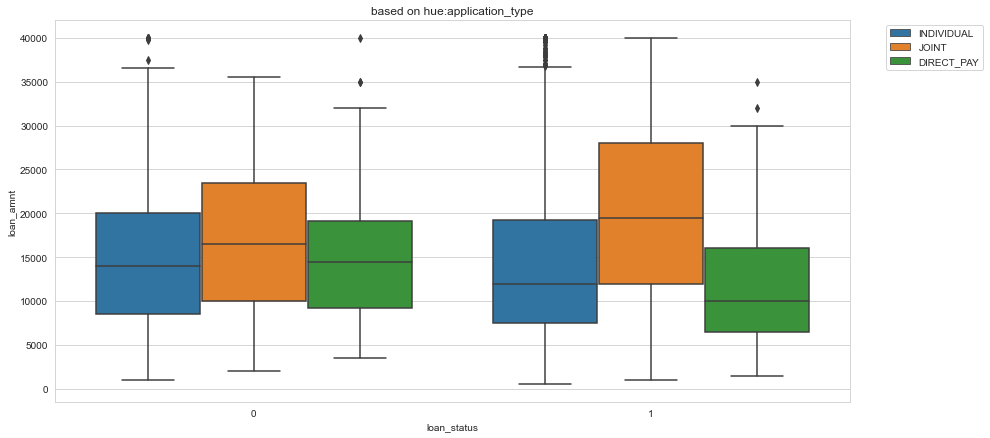

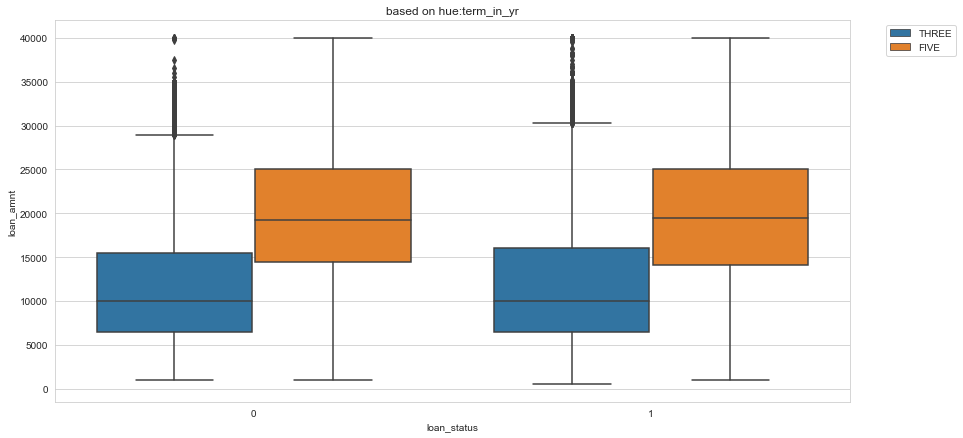

In [23]:
for feature in ['grade', 'sub_grade', 'emp_length', 'home_ownership','verification_status', 'purpose', 'initial_list_status','application_type', 'term_in_yr']:
    plt.figure(figsize=(12,6))
    sns.boxplot( data=df, x='loan_status', hue=feature,y='loan_amnt' )
    plt.tight_layout()
    plt.title(f"based on hue:{feature}")
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

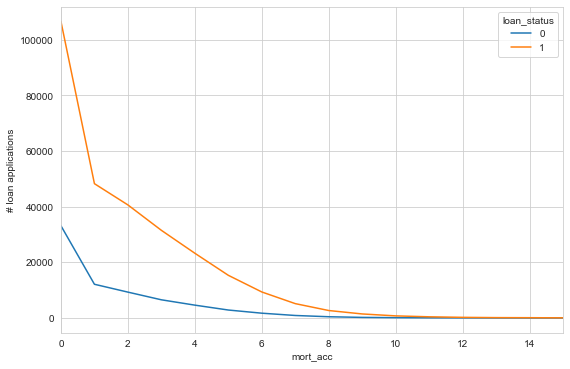

In [24]:
# mortage account
df.groupby('mort_acc')['loan_status'].value_counts().to_frame().to_csv('mort_acc_loan.csv')
mort_acc_loan_status = pd.read_csv('mort_acc_loan.csv').rename(columns={'loan_status.1':'count'})

plt.figure(figsize=(9,6))
sns.lineplot(
    data=mort_acc_loan_status,
    x='mort_acc',
    y='count',
    hue='loan_status',
)
plt.ylabel("# loan applications")
plt.xlim(0,15)
plt.show()

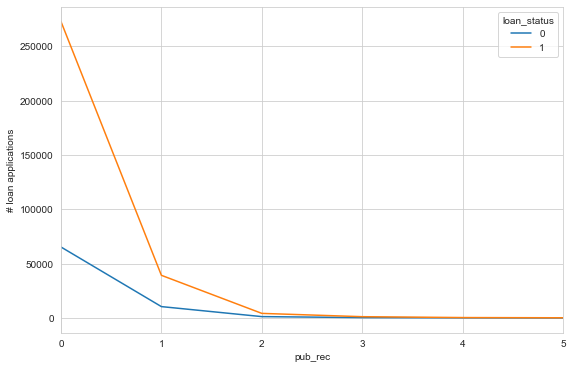

In [25]:
# pub rec
df.groupby('pub_rec')['loan_status'].value_counts().to_frame().to_csv('pub_rec_loan.csv')
pub_rec_loan_status = pd.read_csv('pub_rec_loan.csv').rename(columns={'loan_status.1':'count'})
plt.figure(figsize=(9,6))
sns.lineplot(
    data=pub_rec_loan_status,
    x='pub_rec',
    y='count',
    hue='loan_status',
)
plt.ylabel("# loan applications")
plt.xlim(0,5)
plt.show()

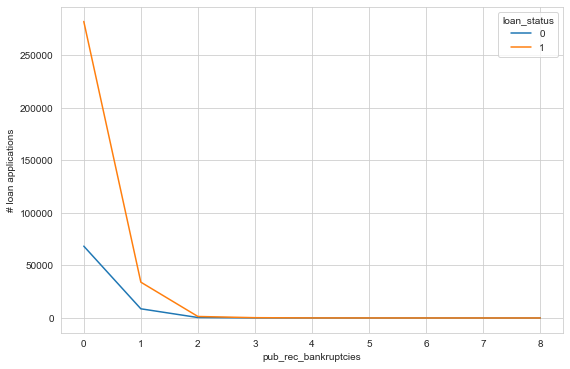

In [26]:
# pub_rec_bankruptcies
df.groupby('pub_rec_bankruptcies')['loan_status'].value_counts().to_frame().to_csv('pub_rec_bankrupt_loan.csv')
pub_rec_bankrupt_loan_status = pd.read_csv('pub_rec_bankrupt_loan.csv').rename(columns={'loan_status.1':'count'})
plt.figure(figsize=(9,6))
sns.lineplot(
    data=pub_rec_bankrupt_loan_status,
    x='pub_rec_bankruptcies',
    y='count',
    hue='loan_status',
)
plt.ylabel("# loan applications")
plt.show()

/tmp/ipykernel_48855/1385253763.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


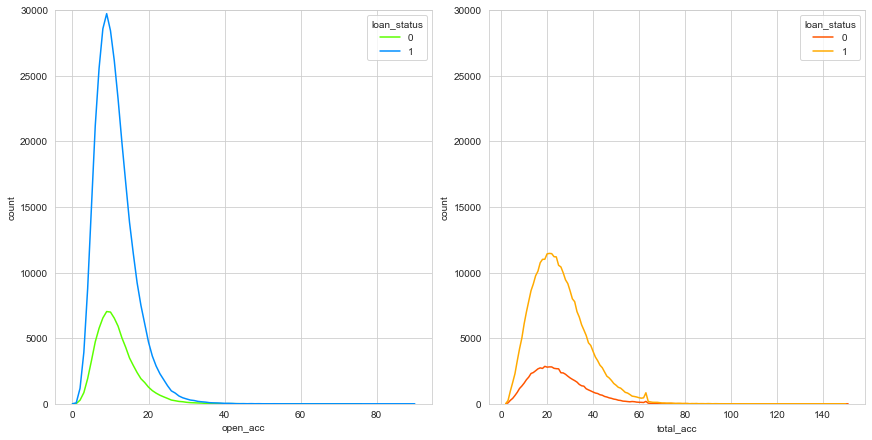

<Figure size 648x432 with 0 Axes>

In [27]:
df.groupby('open_acc')['loan_status'].value_counts().to_frame().to_csv('open_acc_loan.csv')
open_acc_loan_status = pd.read_csv('./open_acc_loan.csv').rename(columns={'loan_status.1':'count'})

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6),constrained_layout=True)
sns.lineplot(
    data=open_acc_loan_status,
    x='open_acc',
    y='count',
    hue='loan_status',
    legend='full',
    ax=ax1,
    palette='gist_rainbow'
)
ax1.set_ylim(0,30000)

df.groupby('total_acc')['loan_status'].value_counts().to_frame().to_csv('total_acc_loan.csv')
total_acc_loan_status = pd.read_csv('total_acc_loan.csv').rename(columns={'loan_status.1':'count'})

plt.figure(figsize=(9,6))
sns.lineplot(
    data=total_acc_loan_status,
    x='total_acc',
    y='count',
    hue='loan_status',
    legend='full',
    ax=ax2,
    palette="autumn"
)
ax2.set_ylim(0,30000)
fig.show()

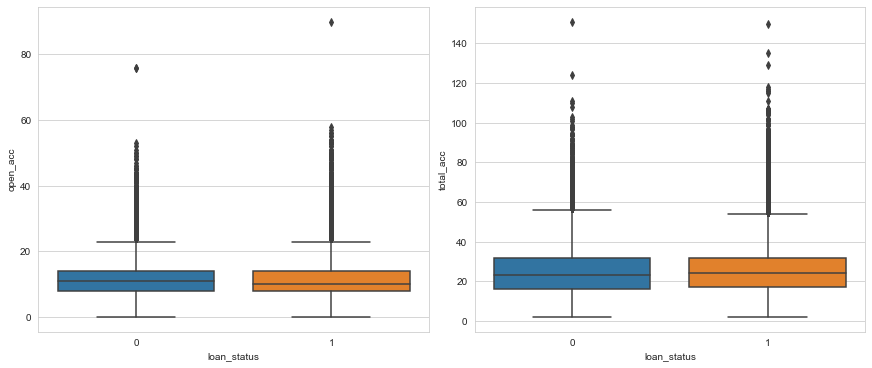

In [28]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,5),constrained_layout=True)
sns.boxplot(
    y=df.open_acc,
    x=df.loan_status,
    ax=ax1
)
sns.boxplot(
    x=df.loan_status,
    y=df.total_acc,
    ax=ax2
)
plt.show()

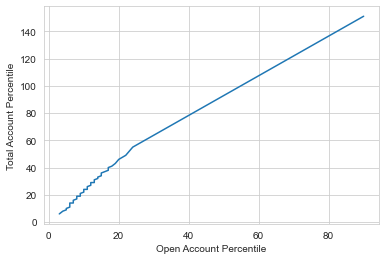

In [29]:
plt.plot(
    np.percentile(df.open_acc,np.linspace(1,100)),
    np.percentile(df.total_acc,np.linspace(1,100))
)
plt.xlabel("Open Account Percentile")
plt.ylabel("Total Account Percentile")
plt.show()

In [30]:
df.drop('total_acc',inplace=True,axis=1)

In [31]:
# We already seen issue_yr, issue_month is not telling about target_variable we can do hypothesis testing and proof also
df.drop(['issue_yr','issue_month'],axis=1,inplace=True)

/tmp/ipykernel_48855/3021735535.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=df.sub_grade.value_counts().sort_index().index,rotation=90)
/tmp/ipykernel_48855/3021735535.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


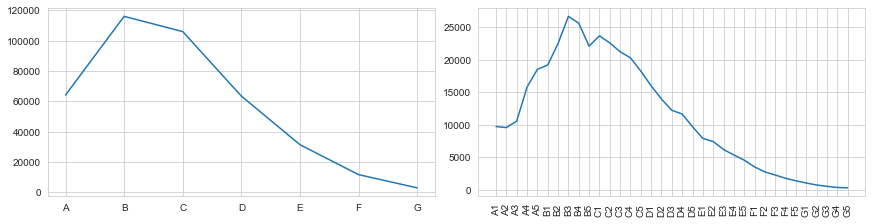

In [32]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,3),constrained_layout=True)
ax1.plot(
    df.grade.value_counts().sort_index().index,
    df.grade.value_counts().sort_index().values, 
)
ax2.plot(
    df.sub_grade.value_counts().sort_index().index,
    df.sub_grade.value_counts().sort_index().values
)
ax2.set_xticklabels(labels=df.sub_grade.value_counts().sort_index().index,rotation=90)
fig.show()

In [33]:
# As per diagram sub_grade and grade tells same. SO Occam's razor principle i remove grade to simplify it
df.drop('grade',axis=1,inplace=True)

In [34]:
df['has_mort_acc']             = df.mort_acc.apply(lambda x: 0 if(x==0) else 1)
df['has_pub_rec']              = df.pub_rec.apply(lambda x: 0 if(x==0) else 1)
df['has_pub_rec_bankruptcies'] =  df.pub_rec_bankruptcies.apply(lambda x: 0 if(x==0) else 1)

df.drop(columns=['mort_acc','pub_rec','pub_rec_bankruptcies'],inplace=True)

In [35]:
df.isna().sum()

loan_amnt                       0
int_rate                        0
sub_grade                       0
emp_title                   22927
emp_length                  18301
home_ownership                  0
annual_inc                      0
verification_status             0
loan_status                     0
purpose                         0
dti                             0
open_acc                        0
revol_bal                       0
revol_util                    276
initial_list_status             0
application_type                0
term_in_yr                      0
address_state                   0
address_city                    0
credit_card_yrs                 0
has_mort_acc                    0
has_pub_rec                     0
has_pub_rec_bankruptcies        0
dtype: int64

In [36]:
# missing percentage is very removing records not affect results
df = df.loc[~ ( (df.emp_length.isna()) & df.emp_title.isna()   )]

In [37]:
df.isna().sum()

loan_amnt                      0
int_rate                       0
sub_grade                      0
emp_title                   4804
emp_length                   178
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
purpose                        0
dti                            0
open_acc                       0
revol_bal                      0
revol_util                   266
initial_list_status            0
application_type               0
term_in_yr                     0
address_state                  0
address_city                   0
credit_card_yrs                0
has_mort_acc                   0
has_pub_rec                    0
has_pub_rec_bankruptcies       0
dtype: int64

In [38]:
df.emp_length.value_counts(dropna=False)

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
NaN             178
Name: emp_length, dtype: int64

In [39]:
def clean_emp_len(s):
    if(type(s)==str):
        s=s.strip()
        if(s.startswith('<')):
            return 0
        elif(s.endswith('year')):
            return 1
        else:
            yr = s[:2].strip()
            yr = int(yr)
            return yr
    else:
        return s

In [40]:
df.emp_length = df.emp_length.apply(lambda x: clean_emp_len(x))

In [41]:
emp_title_len = df.groupby('emp_title')['emp_length'].agg(np.median)
emp_title_len

emp_title
       NSA Industries llc           10.0
   Fibro Source                      0.0
   Long Ilsand College Hospital      5.0
   mortgage banker                   3.0
  Credit rev specialist             10.0
                                    ... 
zozaya officiating                   7.0
zs backroom                         10.0
zueck transportation                 5.0
zulily                               2.0
​License Compliance Investigator    10.0
Name: emp_length, Length: 173105, dtype: float64

In [42]:
for i in df.loc[df.emp_length.isna(),'emp_title'].values:
    #print(df.loc[df.emp_title==i,'emp_length'])
    #print(i,emp_title_len[i])
    df.loc[df.emp_title==i,'emp_length']=emp_title_len[i]

In [43]:
df = df.loc[~(   (df.emp_title.isna())  | (df.emp_length.isna())  | (df.revol_util.isna())        )]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372758 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_amnt                 372758 non-null  float64
 1   int_rate                  372758 non-null  float64
 2   sub_grade                 372758 non-null  object 
 3   emp_title                 372758 non-null  object 
 4   emp_length                372758 non-null  float64
 5   home_ownership            372758 non-null  object 
 6   annual_inc                372758 non-null  float64
 7   verification_status       372758 non-null  object 
 8   loan_status               372758 non-null  int64  
 9   purpose                   372758 non-null  object 
 10  dti                       372758 non-null  float64
 11  open_acc                  372758 non-null  float64
 12  revol_bal                 372758 non-null  float64
 13  revol_util                372758 non-null  f

In [ ]:
sns.pairplot(df,hue='loan_status',corner=True)
plt.show()

# Model Building (logistic regression)

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from category_encoders import TargetEncoder,OneHotEncoder
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,roc_curve, precision_recall_curve,auc,accuracy_score,classification_report,recall_score,precision_score

In [ ]:
X = df.drop(columns='loan_status')
y = df['loan_status']

In [ ]:
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=42) 

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}, y_val shape: {y_val.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

In [ ]:
# Class Imbalance
print(f"y_train:~\n{y_train.value_counts(dropna=False)/ len(y_train) *100}")

In [ ]:
# Encoder
obj_col = df.select_dtypes(np.object_).columns
encoder = TargetEncoder(cols=obj_col)
X_train = encoder.fit_transform(X_train,y_train)
X_val   = encoder.transform(X_val)
X_test  = encoder.transform(X_test)

In [ ]:
# SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [ ]:
# Scaling
scaler = StandardScaler()

X_train_res = scaler.fit_transform(X_train_res)
X_val_res   = scaler.transform(X_val)
X_test_res  = scaler.transform(X_test) 

In [ ]:
model = LogisticRegression(penalty='l2',class_weight='balanced',n_jobs=-1)
hyperparameters = {
    'fit_intercept':[True,False],
    'C': np.linspace(0.1,10000,25)
}

In [ ]:
clf = GridSearchCV(
    model,
    param_grid=hyperparameters,
    scoring='f1',
    n_jobs=-1,
    cv = 5,
    verbose=1,
    return_train_score=True
).fit(
    X_train_res,
    y_train_res
)

In [ ]:
print(f"  \
      Tuned Hyperparameters{clf.best_estimator_}  \
      and it's best score: {clf.best_score_}"
)

In [ ]:
pd.DataFrame(
    data=[clf.cv_results_['mean_test_score'],clf.cv_results_['params']]
).T.rename(columns={0:'mean_train_score', 1: 'parameters'})

In [ ]:
best_model = clf.best_estimator_
best_model

In [ ]:
best_model.fit(
    X_train_res,
    y_train_res,
)

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(best_model, X_train_res, y_train_res, cv=5, n_jobs=-1,return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xticks(rotation=90)
plt.title(label= "Learning Curves (Logistic Regression)")
plt.legend(loc="best")

In [ ]:
y_pred_test =  best_model.predict(X_test_res)
print(f"The accuracy score is { round(accuracy_score( y_true=y_test,y_pred=y_pred_test)*100,2) } %")
print(f"The Recall score is   { round(recall_score(   y_true=y_test,y_pred=y_pred_test)*100,2) } %")
print(f"The Precision score is{ round(precision_score(y_true=y_test,y_pred=y_pred_test)*100,2) } %")
print(f"The F1 score is       { round(f1_score(       y_true=y_test,y_pred=y_pred_test)*100,2) } %")
confusion_matrix(y_true=y_test,y_pred=y_pred_test)

In [ ]:
print(classification_report(y_true=y_test,y_pred=y_pred_test))

In [ ]:
y_pred_proba = best_model.predict_proba(X_test_res)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.title("AU-ROC Curve")
plt.show()

In [ ]:
feature_importance = pd.DataFrame(
    best_model.coef_,
    columns=X_train.columns
).T.rename(columns={0:'values'})

plt.figure(figsize=(30,10))
sns.barplot(x = feature_importance.index,y = feature_importance.values.reshape(-1))
plt.xticks(rotation=75,color="black",fontsize=18)
plt.xlabel('Features', fontsize=21)
plt.show()